## Analysis for Lending Club by Susrita and Pulkit
## --------------------------------------------------------------------
### For this analysis we have done the following :
-  We imported important libraries required
-  We loaded the loan data loan.csv
-  We modified and cleaned the data like null removal, removal of unwanted columns, character conversions etc so that its easy to use
-  We did some univariate analysis
-  We did some bivariate/multivariate analysis
-  We use histplot, countplot, scatterplot, subplot,set_palette graphs for the analysis
-  We derived some conclusions mentioned in the bottom of this ipynb file

In [2]:
#import libraries

import pandas as pd
import numpy as nm
import seaborn as sea
import matplotlib.pyplot as pyl

loan_data = pd.read_csv(r'C:\Users\002O5L744\Downloads\loan\loan.csv')

C:\Users\002O5L744\AppData\Local\Temp\ipykernel_11688\3124687955.py:8: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(r'C:\Users\002O5L744\Downloads\loan\loan.csv')


In [78]:
print(loan_data.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [4]:
print(loan_data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [5]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
print(loan_data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

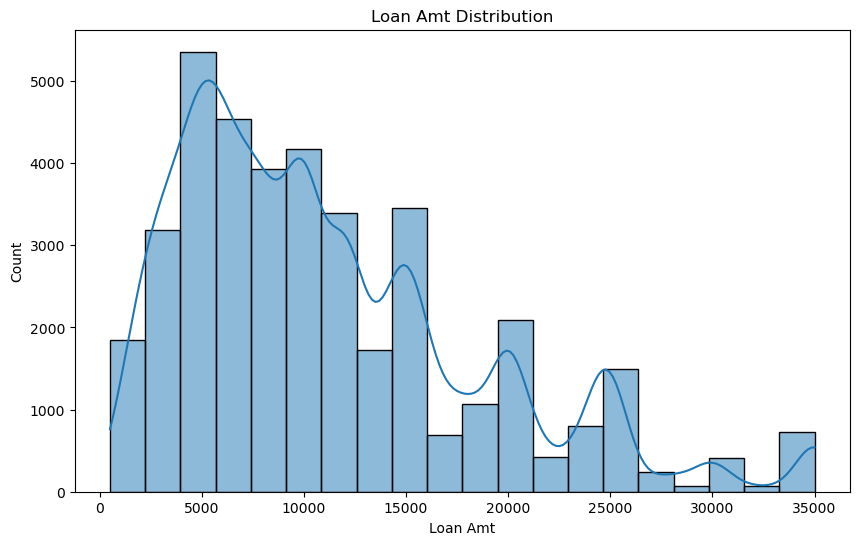

In [6]:
# Univariate on loan amounts
pyl.figure(figsize=(10, 6))
sea.histplot(data=loan_data, x='loan_amnt', bins=20, kde=True)
pyl.title('Loan Amt Distribution')
pyl.xlabel('Loan Amt')
pyl.ylabel('Count')
pyl.show()


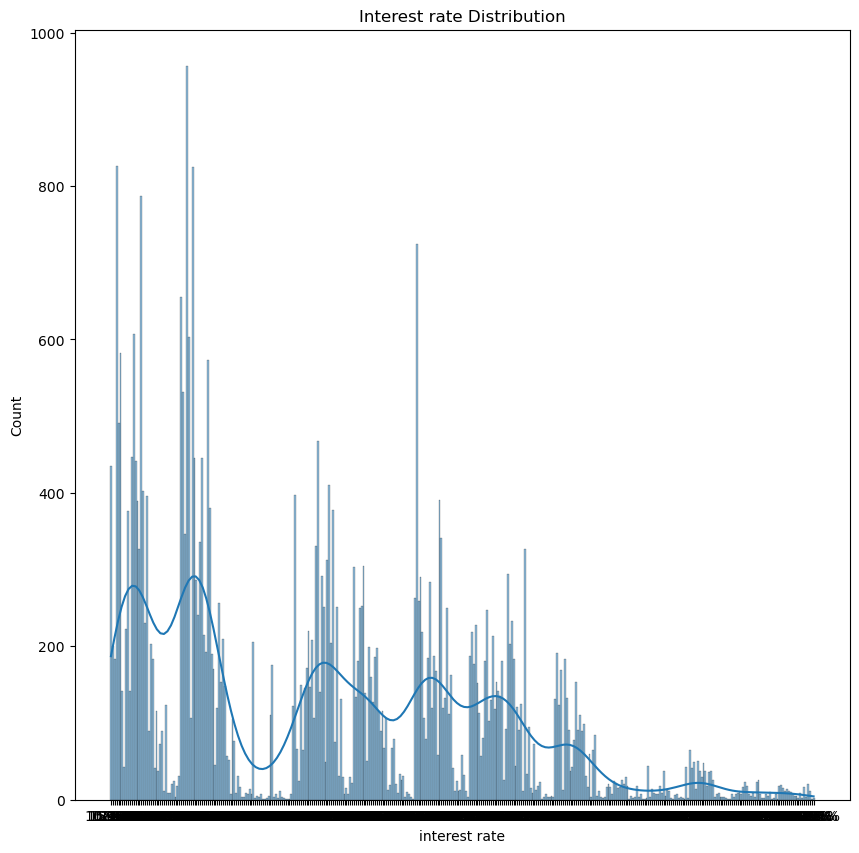

In [7]:
# Univariate on interest rate 
pyl.figure(figsize=(10, 10))
sea.histplot(data=loan_data, x='int_rate', bins=20, kde=True)
pyl.title('Interest rate Distribution')
pyl.xlabel('interest rate')
pyl.ylabel('Count')
pyl.show()

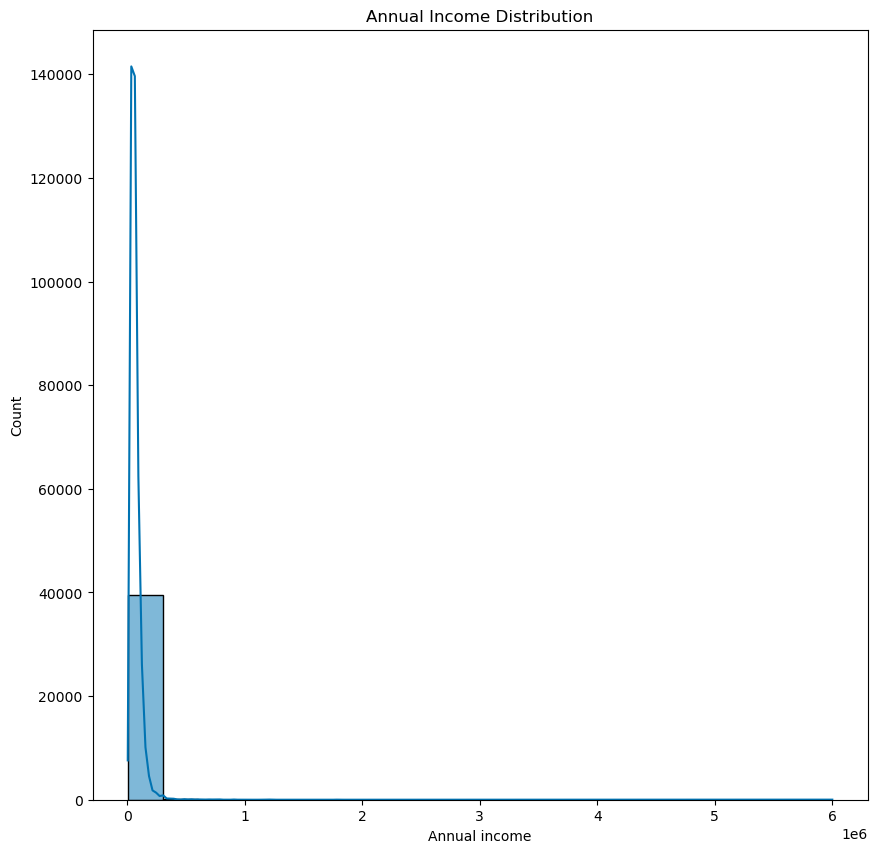

In [50]:
# Univariate on Annual Income
pyl.figure(figsize=(10, 10))
sea.histplot(data=loan_data, x='annual_inc', bins=20, kde=True)
pyl.title('Annual Income Distribution')
pyl.xlabel('Annual income')
pyl.ylabel('Count')
pyl.show()

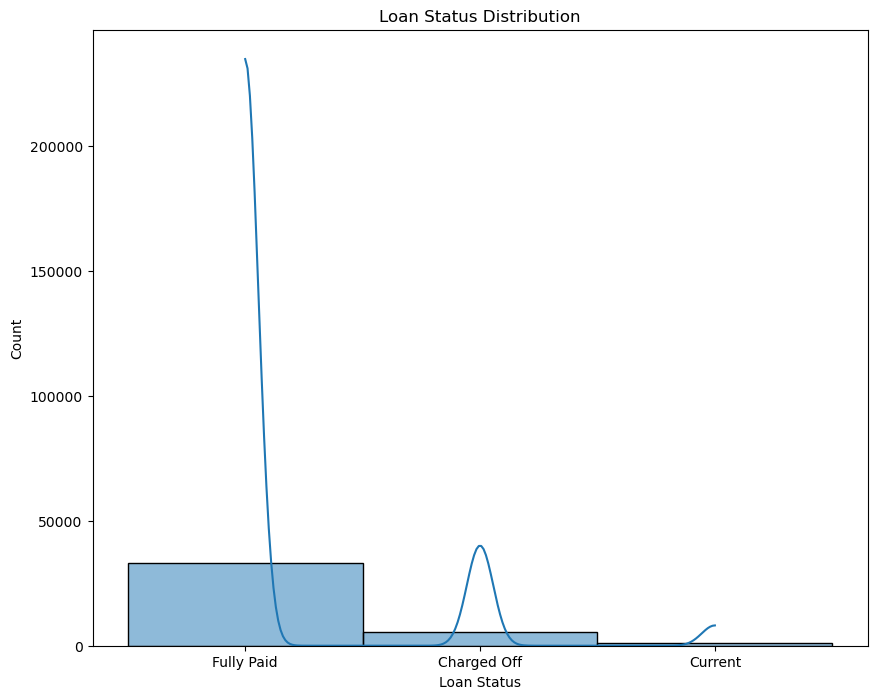

In [8]:
# Univariate on loan status
pyl.figure(figsize=(10, 8))
sea.histplot(data=loan_data, x='loan_status', bins=20, kde=True)
pyl.title('Loan Status Distribution')
pyl.xlabel('Loan Status')
pyl.ylabel('Count')
pyl.show()

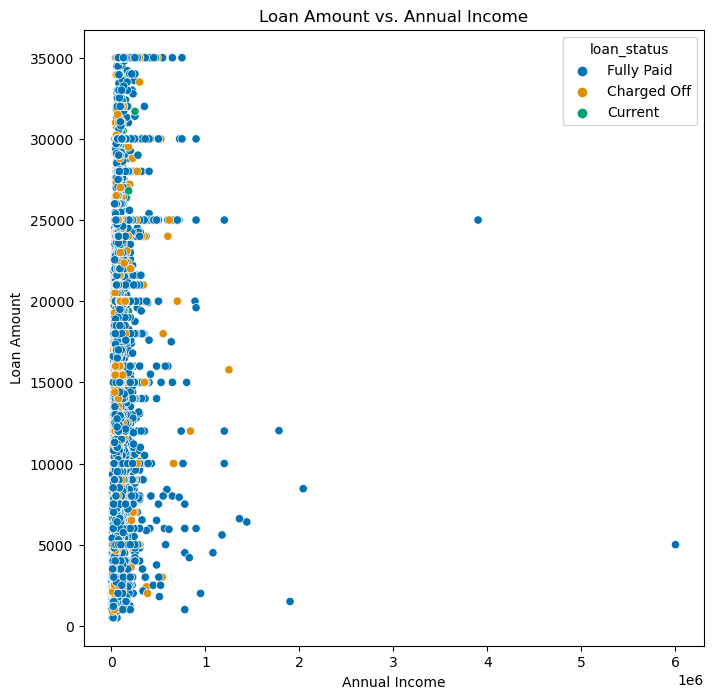

In [51]:
# bivariate of loan amount vs. annual income
pyl.figure(figsize=(8, 8))
sea.scatterplot(data=loan_data, x='annual_inc', y='loan_amnt', hue='loan_status')
pyl.title('Loan Amount vs. Annual Income')
pyl.xlabel('Annual Income')
pyl.ylabel('Loan Amount')
pyl.show()


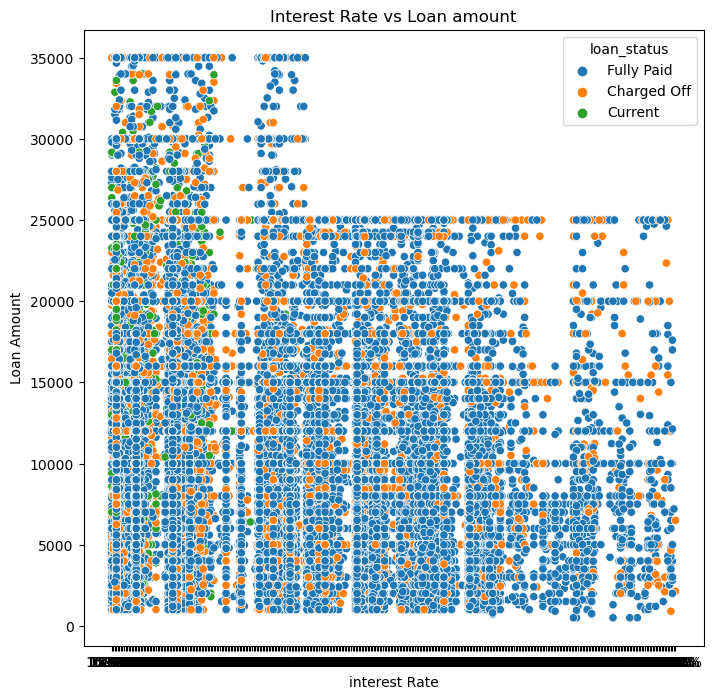

In [9]:
# bivariate of loan amount vs. interest rate
pyl.figure(figsize=(8, 8))
sea.scatterplot(data=loan_data, x='int_rate', y='loan_amnt', hue='loan_status')
pyl.title('Interest Rate vs Loan amount')
pyl.xlabel('interest Rate')
pyl.ylabel('Loan Amount')
pyl.show()

In [10]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [12]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [11]:
# Check if the 'int_rate' column contains only strings
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: str(x) if isinstance(x, (float, int)) else x)

# Split the 'int_rate' column
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'].apply(lambda x: x.split('%')[0]))

# Check and handle float values in the 'emp_length' column
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: str(x) if isinstance(x, (float, int)) else x)

# Split the 'emp_length' column and replace non-parsable values with NaN
loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'].apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])), errors='coerce')

# Convert the 'int_rate' column to strings if not already
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: str(x))

# Split the 'int_rate' column and convert to numeric
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'].apply(lambda x: x.split('%')[0]))


<Axes: xlabel='loan_status', ylabel='count'>

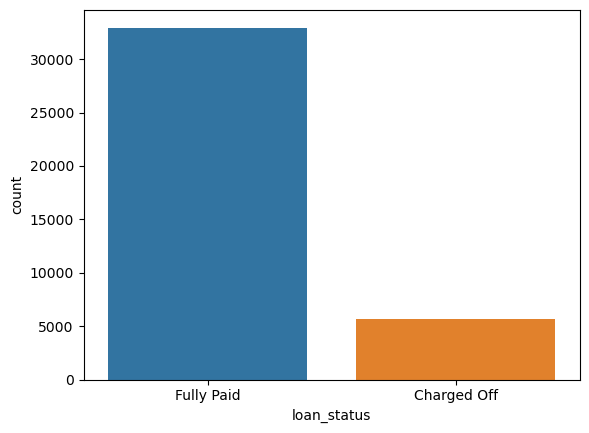

In [20]:
sea.countplot(x = 'loan_status', data = loan_data)

<Axes: xlabel='grade', ylabel='count'>

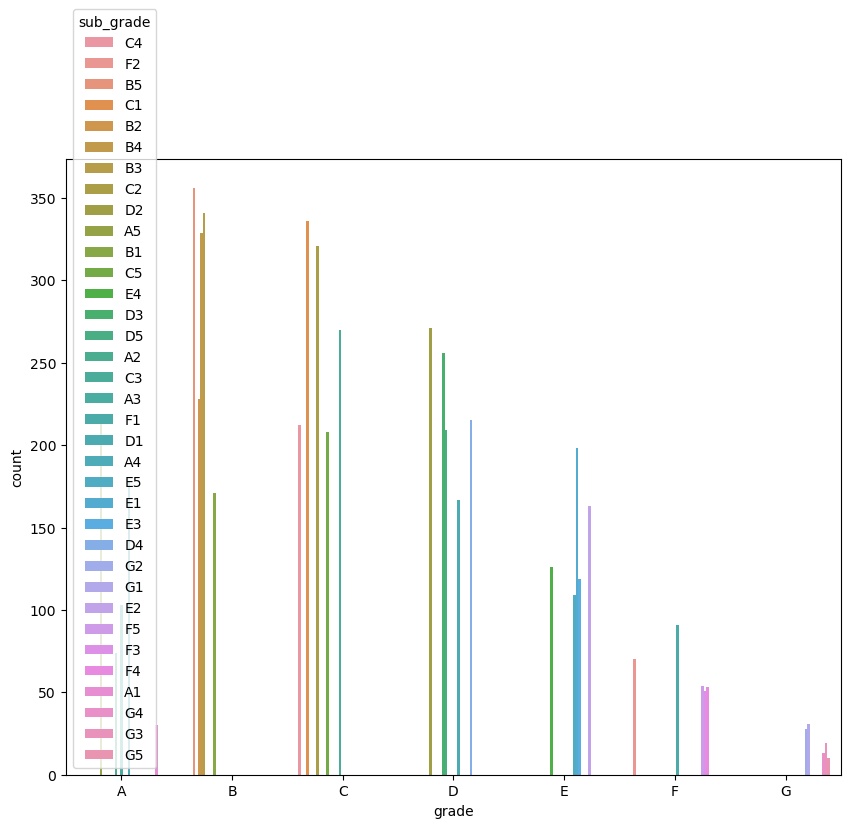

In [12]:
fig, ax = pyl.subplots(figsize=(10,8))
sea.set_palette('colorblind')
sea.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

C:\Users\002O5L744\AppData\Local\Temp\ipykernel_8572\520867048.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyl.subplot(221)


<Axes: xlabel='emp_length', ylabel='count'>

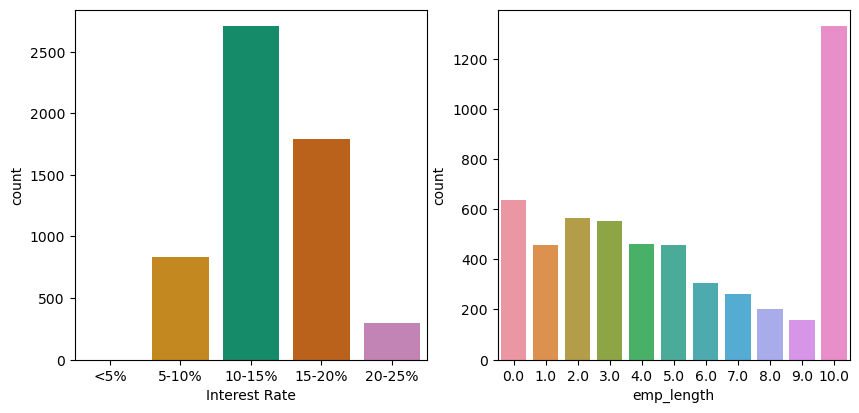

In [55]:
# Assuming 'int_rate_groups' is a new column you want to create based on 'int_rate'
# Create 'int_rate_groups' based on your logic
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=[0, 5, 10, 15, 20, 25], labels=['<5%', '5-10%', '10-15%', '15-20%', '20-25%'])

# Create subplots
fig, ax = pyl.subplots(figsize=(10, 10))

pyl.subplot(221)
sea.countplot(x='int_rate_groups', data=loan_data[loan_data['loan_status'] == 'Charged Off'])
pyl.xlabel('Interest Rate')

# Assuming 'emp_length' exists and is correctly named
pyl.subplot(222)
sea.countplot(x='emp_length', data=loan_data[loan_data['loan_status'] == 'Charged Off'])


Text(0.5, 0, 'Annual Income Groups')

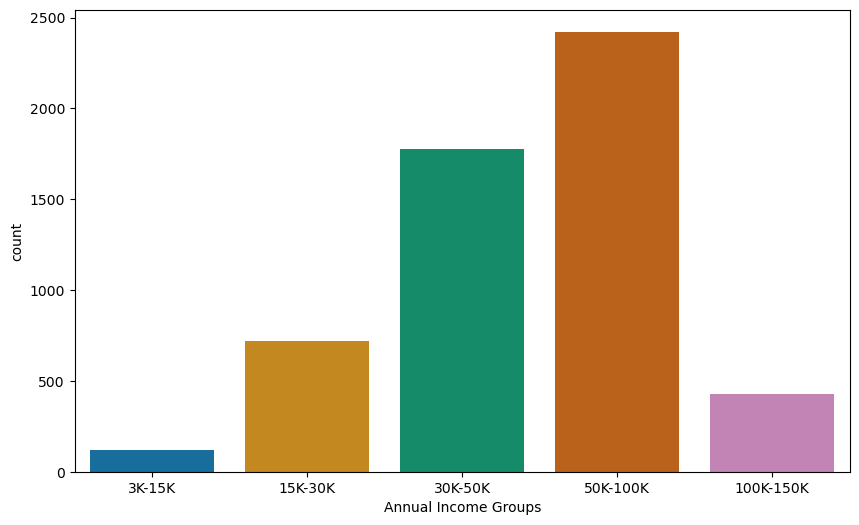

In [13]:
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=[3000, 15000, 30000, 50000, 100000, 150000], labels=['3K-15K', '15K-30K', '30K-50K', '50K-100K', '100K-150K'])
fig, ax = pyl.subplots(figsize=(10, 6))
sea.countplot(x='annual_inc_groups', data=loan_data[loan_data['loan_status'] == 'Charged Off'])
pyl.xlabel('Annual Income Groups')

<Axes: xlabel='verification_status', ylabel='count'>

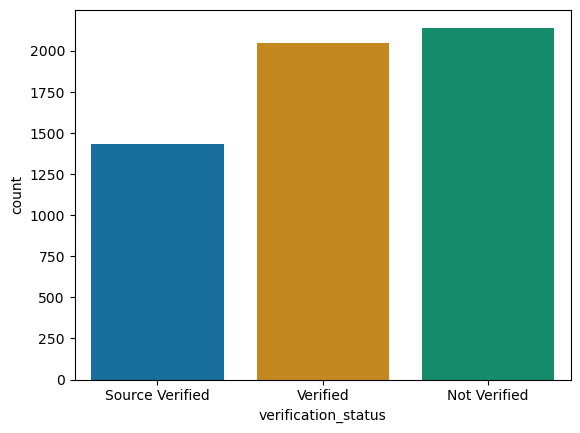

In [15]:
sea.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='term'>

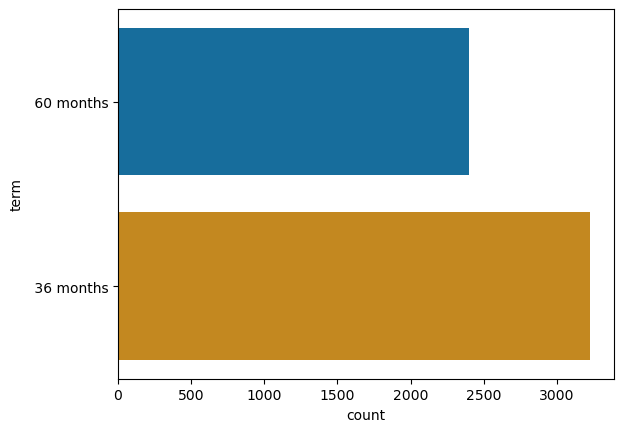

In [16]:
sea.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

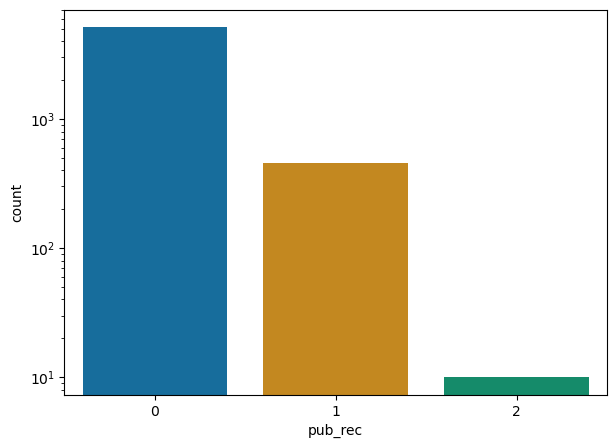

In [29]:
fig,ax = pyl.subplots(figsize = (7,5))
ax.set_yscale('log')
sea.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [27]:
print(loan_data['loan_status'].value_counts())


Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


In [28]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'chargeoff_within_12_mths',
       'annual_inc_groups'],
      dtype='object')

In [36]:
(loan_data.isna().sum()/len(loan_data.index))*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.185033
emp_length                    2.677761
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
url                           0.000000
desc                         32.472717
purpose                       0.000000
title                         0.028514
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [25]:
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_data.head()

KeyError: "['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'] not found in axis"

In [38]:
mode_value = loan_data['emp_length'].mode()[0]
print("Mode : " + str(mode_value))
loan_data['emp_length'].value_counts()

Mode : 10.0


10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [23]:
loan_data.shape

(38577, 49)

<Axes: xlabel='inq_last_6mths', ylabel='count'>

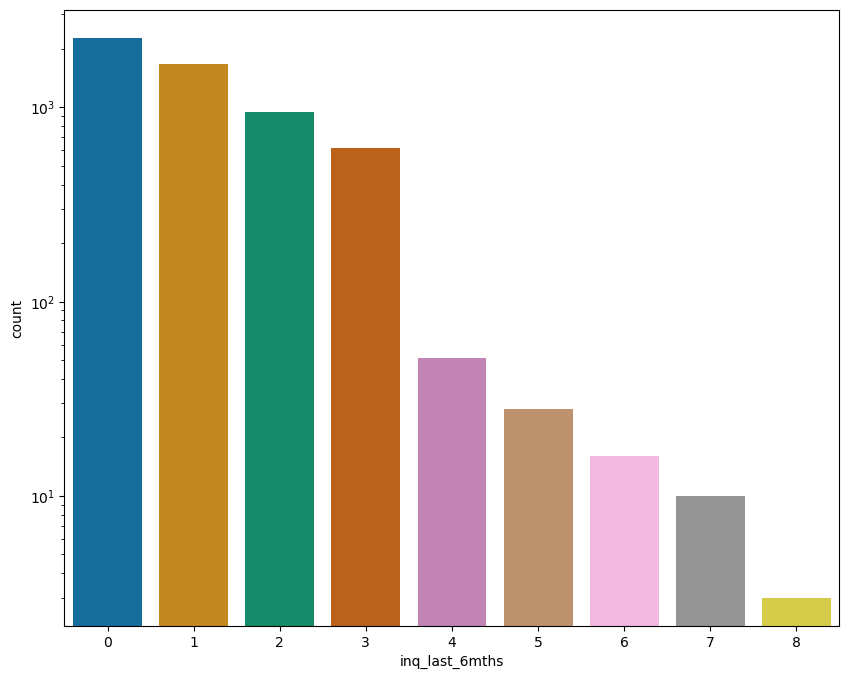

In [32]:
fig,ax = pyl.subplots(figsize = (10,8))
ax.set_yscale('log')
sea.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [33]:
#checking unique values for home_ownership again
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

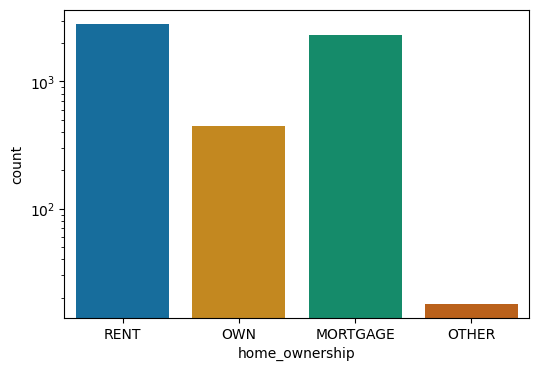

In [93]:
fig, ax = pyl.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sea.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

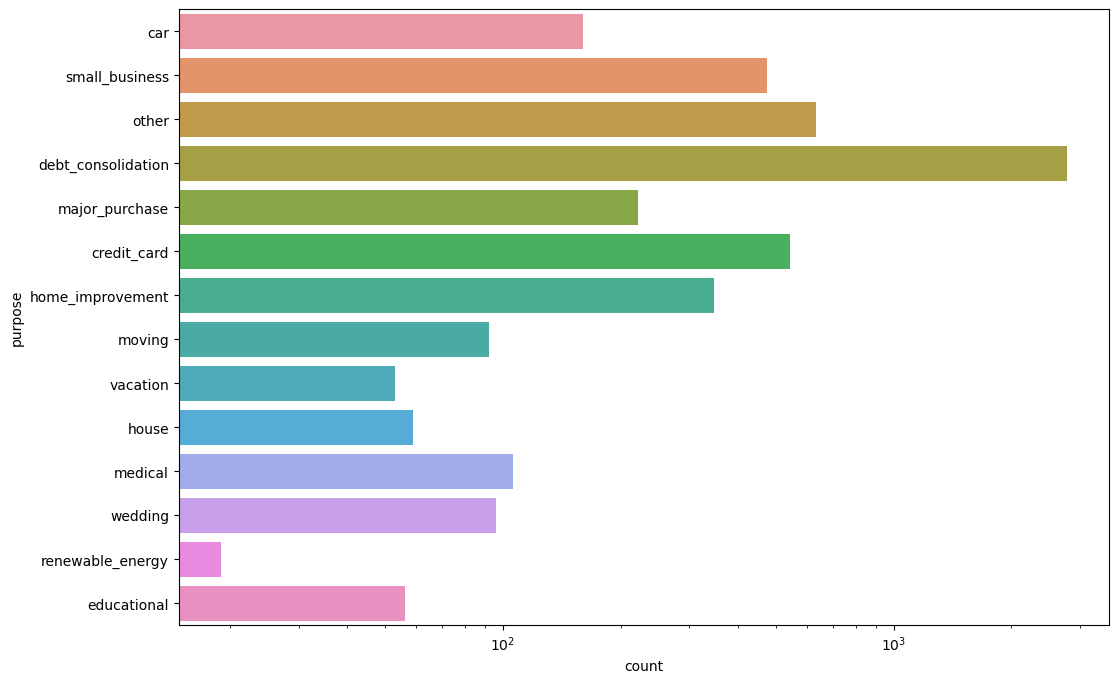

In [34]:
fig, ax = pyl.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sea.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])


<Axes: xlabel='loan_amnt_groups', ylabel='count'>

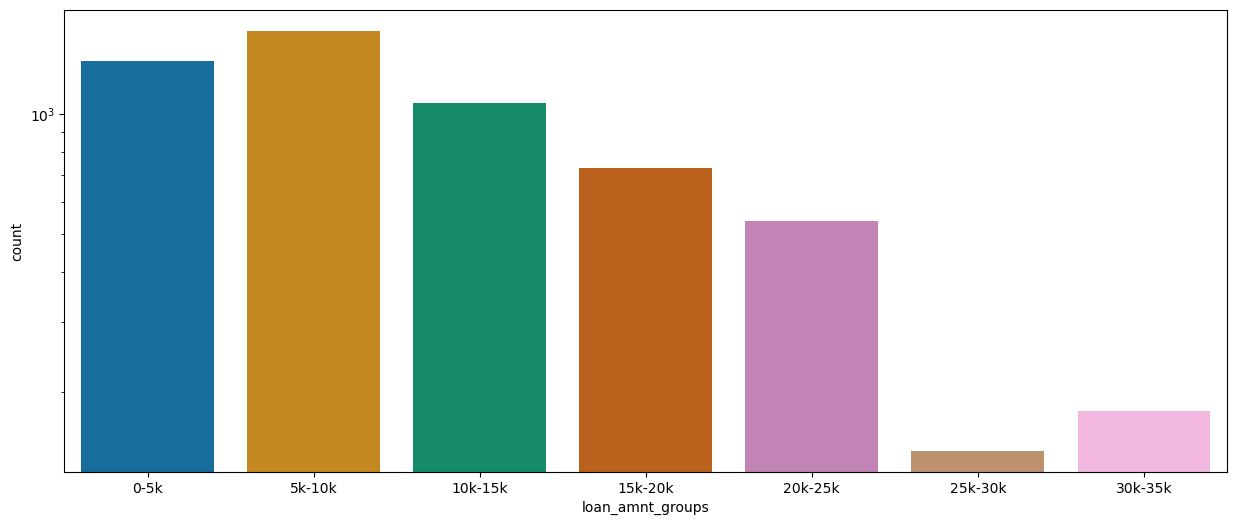

In [35]:
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
fig,ax = pyl.subplots(figsize = (15,6))
ax.set_yscale('log')
sea.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

# Observations for lending club by Susrita and Pulkit
## Analysis considering charged off loans for other important columns :
-  Persons who receive interest at the rate of 11-16% are likely to default
-  Persons whose home ownership as 'RENT' or 'MORTGAGE' are likely to default
-  Persons who have taken loan for purpose debt_cosolidation are likely to default
-  When the no of enquiries in last 6 months is 0 are likely to default
-  When status is not verified are likely to default
-  when annual income is 50k - 100k are likely to default
-  When Term is 36 months are likely to default
-  When employee working length is 10 years are likely to default
-  When grade is 'B' are likely to default
-  When loan amount is between 5k - 10k are likely to default